In [1]:
# load libraries
import numpy as np
import pandas as pd
import os
import pdb


# For plotting
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode() # for exporting

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
## input
data_path = "../data"
input_path = f"{data_path}/experiment_result_v3.csv"
input_path_uncomp = f"{data_path}/experiment_uncompressed_result_v2.csv"
class_id = "0"
visual_metric = "MOTA"
seq_name1 = "BasketballPass"
seq_name2 = "BlowingBubbles"

In [3]:
df = pd.read_csv(input_path, sep=',')
df_uncomp = pd.read_csv(input_path_uncomp, sep=',')
df = pd.concat([df_uncomp, df])
df['F1'] = 2 * df['Prcn'] * df['Rcll'] / (df['Prcn'] + df['Rcll'])
df['MOTP'] = ( 1 - df['MOTP'] ) * 100
header = ['class_cat', 'seq_name', 'class_id', 'qp', 'msr', 'idtp', 'idfp', 'idfn', 'IDF1', 'IDP', 'IDR',
          'Rcll', 'Prcn', 'F1', 'GT', 'MT', 'PT', 'ML', 'num_detections', 'FP', 'FN', 'IDs', 'FM', 'MOTA', 'MOTP']
df = df[header] # re-arrange
df.columns = ['class_cat', 'seq_name', 'class_id', 'QP', 'MSR', 'IDTP', 'IDFP', 'IDFN', 'IDF1', 'IDP', 'IDR',
          'Recall', 'Precision', 'F1', 'GT', 'MT', 'PT', 'ML', 'TP', 'FP', 'FN', 'IDs', 'FM', 'MOTA', 'MOTP']
header = df.columns
df = df.query('class_id == "0" or class_id == 0')
df['QP'] = df['QP'].apply(lambda x: "Uncompressed" if x == 0 else x)
df['MSR'] = df['MSR'].apply(lambda x: "Uncompressed" if x == 0 else x)
df_BP = df.query(f'seq_name == "{seq_name1}" and (MSR == 16 or MSR == "Uncompressed")')
df_BB = df.query(f'seq_name == "{seq_name2}" and (MSR == 16 or MSR == "Uncompressed")')

In [4]:
# ----------------------------------------------------------------------------------------------------
# qp
# ----------------------------------------------------------------------------------------------------
df_seq = df_BP
print(df_seq.iloc[:,3:].to_latex(index=False, multirow=True))

display(df_seq)
df_seq_uncomp = df_seq.query('QP == "Uncompressed"').reset_index(drop=True)

fig = go.Figure()
x_base = df_seq['QP']
y_const = [df_seq_uncomp[visual_metric][0] for i in range(len(x_base))]
fig.add_trace(go.Scatter(x=x_base, y=y_const,
                    mode='lines',
                    line=dict(dash='dash'),
                    name='Uncompressed'))
fig.add_trace(go.Scatter(x=x_base, y=df_seq[visual_metric],
                    mode='lines+markers',
                    name='Compressed (msr=16)'))

x_name = "QP"
y_name = visual_metric
z_name = "MSR"
fig.update_layout(font=dict(
                    color="black",
                    size=14),
                   xaxis_title=x_name,
                   yaxis_title=y_name)
fig.show()
# fig.write_image("C:/OneDrive/SFU/ENSC498, 499/images/BasketballPass_0.pdf",width=1000, height=576)

\begin{tabular}{llrrrrrrrrrrrrrrrrrrrr}
\toprule
          QP &          MSR &   IDTP &    IDFP &    IDFN &  IDF1 &   IDP &   IDR &  Recall &  Precision &    F1 &  GT &  MT &  PT &  ML &   TP &  FP &   FN &  IDs &  FM &  MOTA &  MOTP \\
\midrule
Uncompressed & Uncompressed & 669.00 & 1105.00 & 1522.00 & 33.80 & 37.70 & 30.50 &   77.90 &      96.70 & 86.29 &   8 &   4 &   3 &   1 & 1707 &  58 &  484 &   52 &  73 & 72.90 & 81.50 \\
          18 &           16 & 699.00 & 1074.00 & 1492.00 & 35.30 & 39.40 & 31.90 &   78.10 &      97.10 & 86.57 &   8 &   2 &   5 &   1 & 1712 &  52 &  479 &   52 &  68 & 73.40 & 81.80 \\
          22 &           16 & 725.00 & 1036.00 & 1466.00 & 36.80 & 41.20 & 33.10 &   78.10 &      97.70 & 86.81 &   8 &   3 &   4 &   1 & 1711 &  41 &  480 &   51 &  69 & 73.90 & 82.00 \\
          26 &           16 & 713.00 & 1035.00 & 1478.00 & 36.30 & 40.80 & 32.50 &   77.60 &      97.80 & 86.54 &   8 &   1 &   6 &   1 & 1700 &  39 &  491 &   49 &  64 & 73.60 & 82.10 \\
  

class_cat        seq_name class_id            QP           MSR   IDTP    IDFP    IDFN  IDF1   IDP   IDR  Recall  Precision    F1  GT  MT  PT  ML    TP  FP    FN  IDs  FM  MOTA  MOTP
20     ClassD  BasketballPass        0  Uncompressed  Uncompressed 669.00 1105.00 1522.00 33.80 37.70 30.50   77.90      96.70 86.29   8   4   3   1  1707  58   484   52  73 72.90 81.50
644    ClassD  BasketballPass        0            18            16 699.00 1074.00 1492.00 35.30 39.40 31.90   78.10      97.10 86.57   8   2   5   1  1712  52   479   52  68 73.40 81.80
660    ClassD  BasketballPass        0            22            16 725.00 1036.00 1466.00 36.80 41.20 33.10   78.10      97.70 86.81   8   3   4   1  1711  41   480   51  69 73.90 82.00
676    ClassD  BasketballPass        0            26            16 713.00 1035.00 1478.00 36.30 40.80 32.50   77.60      97.80 86.54   8   1   6   1  1700  39   491   49  64 73.60 82.10
692    ClassD  BasketballPass        0            30            16 718.00  985.00 1473.00 37.00 42.20 32.80   75.30      97.40 84.94   8   1   6   1  1650  44   541   46  65 71.20 82.50
708    ClassD  BasketballPass        0            34            16 702.00  931.00 1489.00 36.80 43.00 32.00   72.60      97.90 83.37   8   1   6   1  1590  34   601   42  55 69.10 82.20
724    ClassD  BasketballPass        0            38            16 604.00  886.00 1587.00 32.90 40.50 27.60   66.10      97.80 78.88   8   1   6   1  1448  33   743   46  57 62.50 80.80
740    ClassD  BasketballPass        0            42            16 591.00  707.00 1600.00 34.00 45.50 27.00   57.20      97.30 72.05   8   1   6   1  1254  35   937   39  57 53.90 78.90
756    ClassD  BasketballPass        0            46            16 413.00  394.00 1778.00 27.60 51.20 18.80   33.60      92.20 49.25   8   0   5   3   736  62  1455   25  41 29.60 76.90

In [5]:
# ----------------------------------------------------------------------------------------------------
# msr
# ----------------------------------------------------------------------------------------------------
df_seq = df_BB
display(df_seq)
df_seq_uncomp = df_seq.query('QP == "Uncompressed"').reset_index(drop=True)

fig = go.Figure()
x_base = df_seq['QP']
y_const = [df_seq_uncomp[visual_metric][0] for i in range(len(x_base))]
fig.add_trace(go.Scatter(x=x_base, y=y_const,
                    mode='lines',
                    line=dict(dash='dash'),
                    name='Uncompressed'))
fig.add_trace(go.Scatter(x=x_base, y=df_seq[visual_metric],
                    mode='lines+markers',
                    name='Compressed (MSR=16)'))

x_name = "QP"
y_name = visual_metric
z_name = "MSR"
fig.update_layout(font=dict(
                    color="black",
                    size=14),
                   xaxis_title=x_name,
                   yaxis_title=y_name)
fig.show()
# fig.write_image("C:/OneDrive/SFU/ENSC498, 499/images/BlowingBubbles_0.pdf",width=1000, height=576)

class_cat        seq_name class_id            QP           MSR   IDTP   IDFP   IDFN  IDF1   IDP   IDR  Recall  Precision    F1  GT  MT  PT  ML   TP   FP   FN  IDs  FM  MOTA  MOTP
24     ClassD  BlowingBubbles        0  Uncompressed  Uncompressed 753.00 373.00 279.00 69.80 66.90 73.00   94.10      86.30 90.03   3   2   0   1  971  154   61    2   5 79.00 90.00
772    ClassD  BlowingBubbles        0            18            16 874.00 240.00 158.00 81.50 78.50 84.70   95.70      88.80 92.12   3   2   0   1  988  125   44    1   2 83.50 89.90
788    ClassD  BlowingBubbles        0            22            16 986.00 105.00  46.00 92.90 90.40 95.50   95.40      90.40 92.83   3   2   0   1  985  105   47    0   3 85.30 90.00
804    ClassD  BlowingBubbles        0            26            16 986.00  86.00  46.00 93.80 92.00 95.50   95.40      92.00 93.67   3   2   0   1  985   86   47    0   3 87.10 90.10
820    ClassD  BlowingBubbles        0            30            16 991.00  49.00  41.00 95.70 95.30 96.00   95.90      95.30 95.60   3   2   0   1  990   49   42    0   2 91.20 90.10
836    ClassD  BlowingBubbles        0            34            16 949.00  59.00  83.00 93.10 94.10 92.00   94.50      96.80 95.64   3   2   0   1  975   32   57    1   4 91.30 89.90
852    ClassD  BlowingBubbles        0            38            16 929.00  89.00 103.00 90.70 91.30 90.00   95.10      96.50 95.79   3   2   0   1  981   36   51    2   2 91.40 89.70
868    ClassD  BlowingBubbles        0            42            16 675.00 350.00 357.00 65.70 65.90 65.40   91.70      92.40 92.05   3   2   0   1  946   78   86    5   6 83.60 88.60
884    ClassD  BlowingBubbles        0            46            16 340.00  98.00 692.00 46.30 77.60 32.90   42.00      99.10 59.00   3   0   2   1  433    4  599   11  13 40.50 86.40

C:\Users\Takehiro\Miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\Takehiro\Miniconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\Takehiro\Miniconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



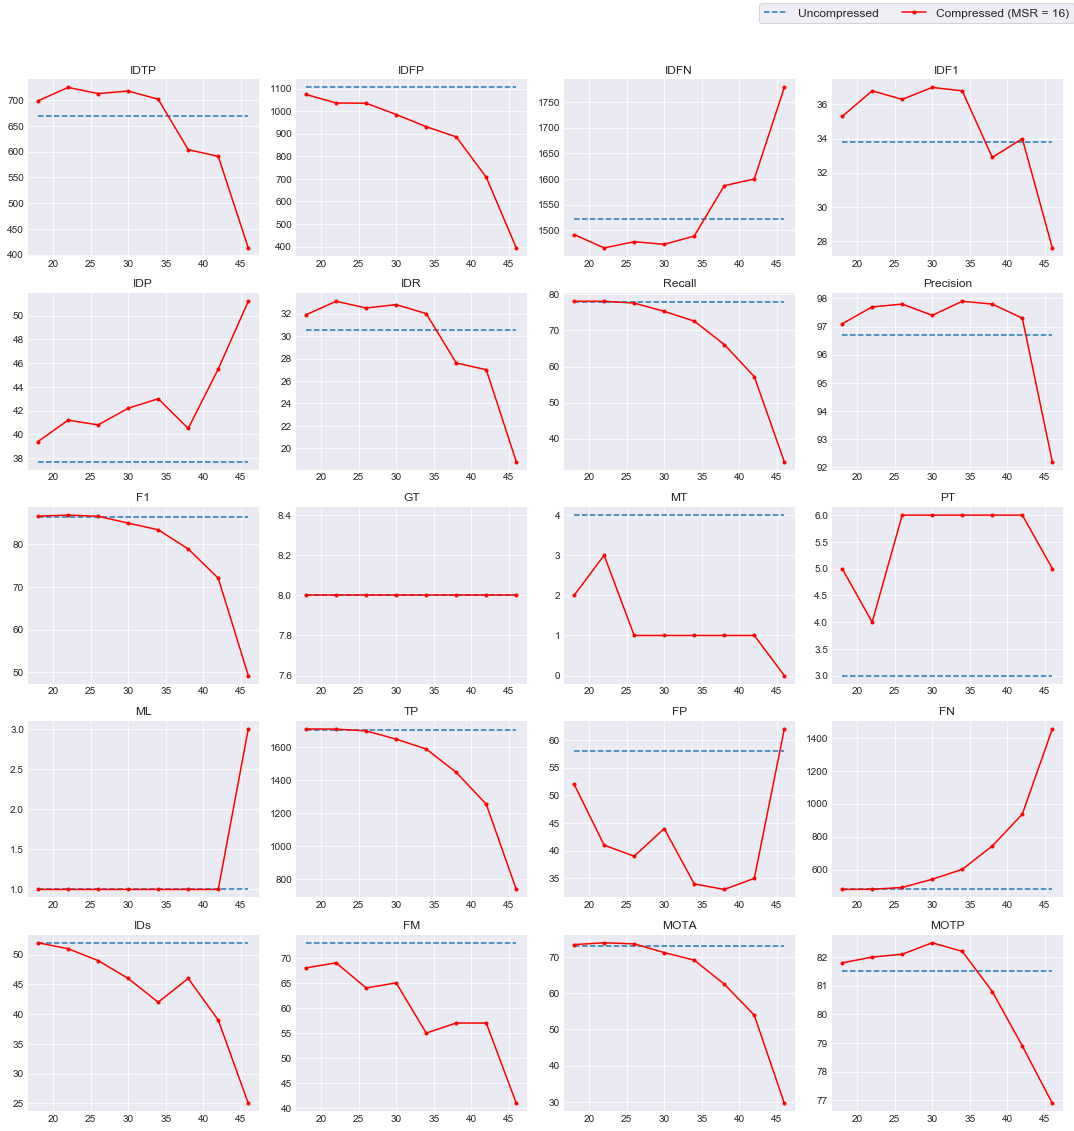

In [6]:
plt.style.use('seaborn-darkgrid')

df_seq_uncomp = df_BP.query('QP == "Uncompressed"')
df_seq = df_BP.query('QP != "Uncompressed"')

fig, axs = plt.subplots(5, 4, figsize=(15,15))

num = 0
for row in range(5):
    for col in range(4):
        
        
        # plot uncompressed result
        x = df_seq['QP']
        metric = df_seq.iloc[:, 5+num].name
        y_const = [df_seq_uncomp[metric] for i in range(len(x))]
        axs[row, col].set_title(metric)
        axs[row, col].plot(x, y_const, '--', label='Uncompressed')
        
        # plot metric
        y = df_seq.iloc[:, 5+num]
        axs[row, col].plot(x, y, 'r.-', label='Compressed (MSR = 16)')

        
        num += 1
        
        if row == 0 and col == 0:
            lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
            lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
            fig.legend(lines, labels, loc=4, ncol=2, mode="", borderaxespad=.5,
                       frameon=True, bbox_to_anchor=(0., 1.02, 1., .102), fontsize='large')

fig.tight_layout()
# fig.savefig("C:/OneDrive/SFU/ENSC498, 499/images/BasketballPass_0_multiplots_qp.pdf", bbox_inches='tight')

C:\Users\Takehiro\Miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\Takehiro\Miniconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\Takehiro\Miniconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



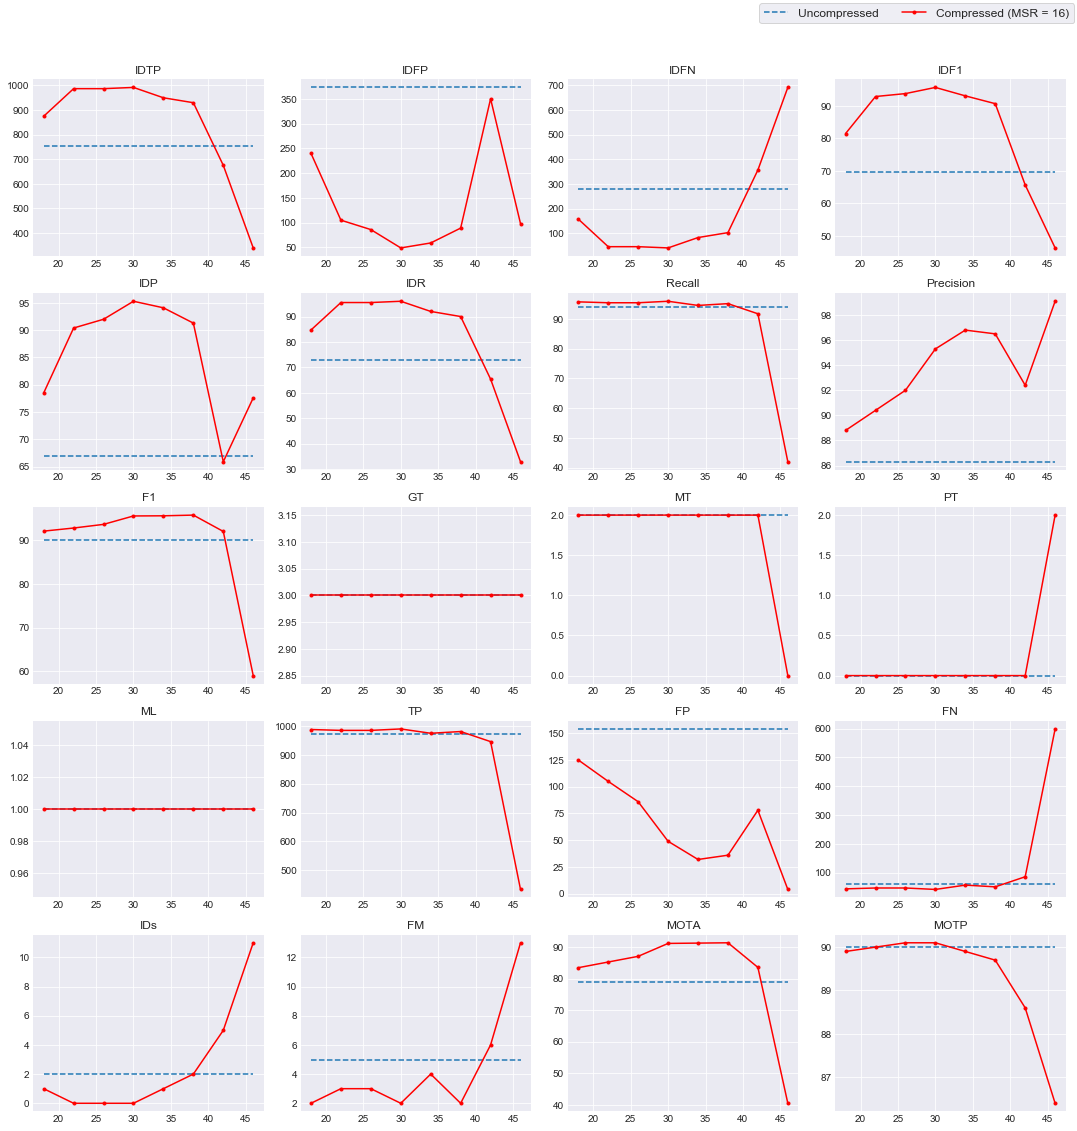

In [7]:
plt.style.use('seaborn-darkgrid')

df_seq_uncomp = df_BB.query('QP == "Uncompressed"')
df_seq = df_BB.query('QP != "Uncompressed"')

fig, axs = plt.subplots(5, 4, figsize=(15,15))

num = 0
for row in range(5):
    for col in range(4):
        
        
        # plot uncompressed result
        x = df_seq['QP']
        metric = df_seq.iloc[:, 5+num].name
        y_const = [df_seq_uncomp[metric] for i in range(len(x))]
        axs[row, col].set_title(metric)
        axs[row, col].plot(x, y_const, '--', label='Uncompressed')
        
        # plot metric
        y = df_seq.iloc[:, 5+num]
        axs[row, col].plot(x, y, 'r.-', label='Compressed (MSR = 16)')

        
        num += 1
        
        if row == 0 and col == 0:
            lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
            lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
            fig.legend(lines, labels, loc=4, ncol=2, mode="", borderaxespad=.5,
                       frameon=True, bbox_to_anchor=(0., 1.02, 1., .102), fontsize='large')


fig.tight_layout()
# fig.savefig("C:/OneDrive/SFU/ENSC498, 499/images/BlowingBubbles_0_multiplots_qp.pdf", bbox_inches='tight')

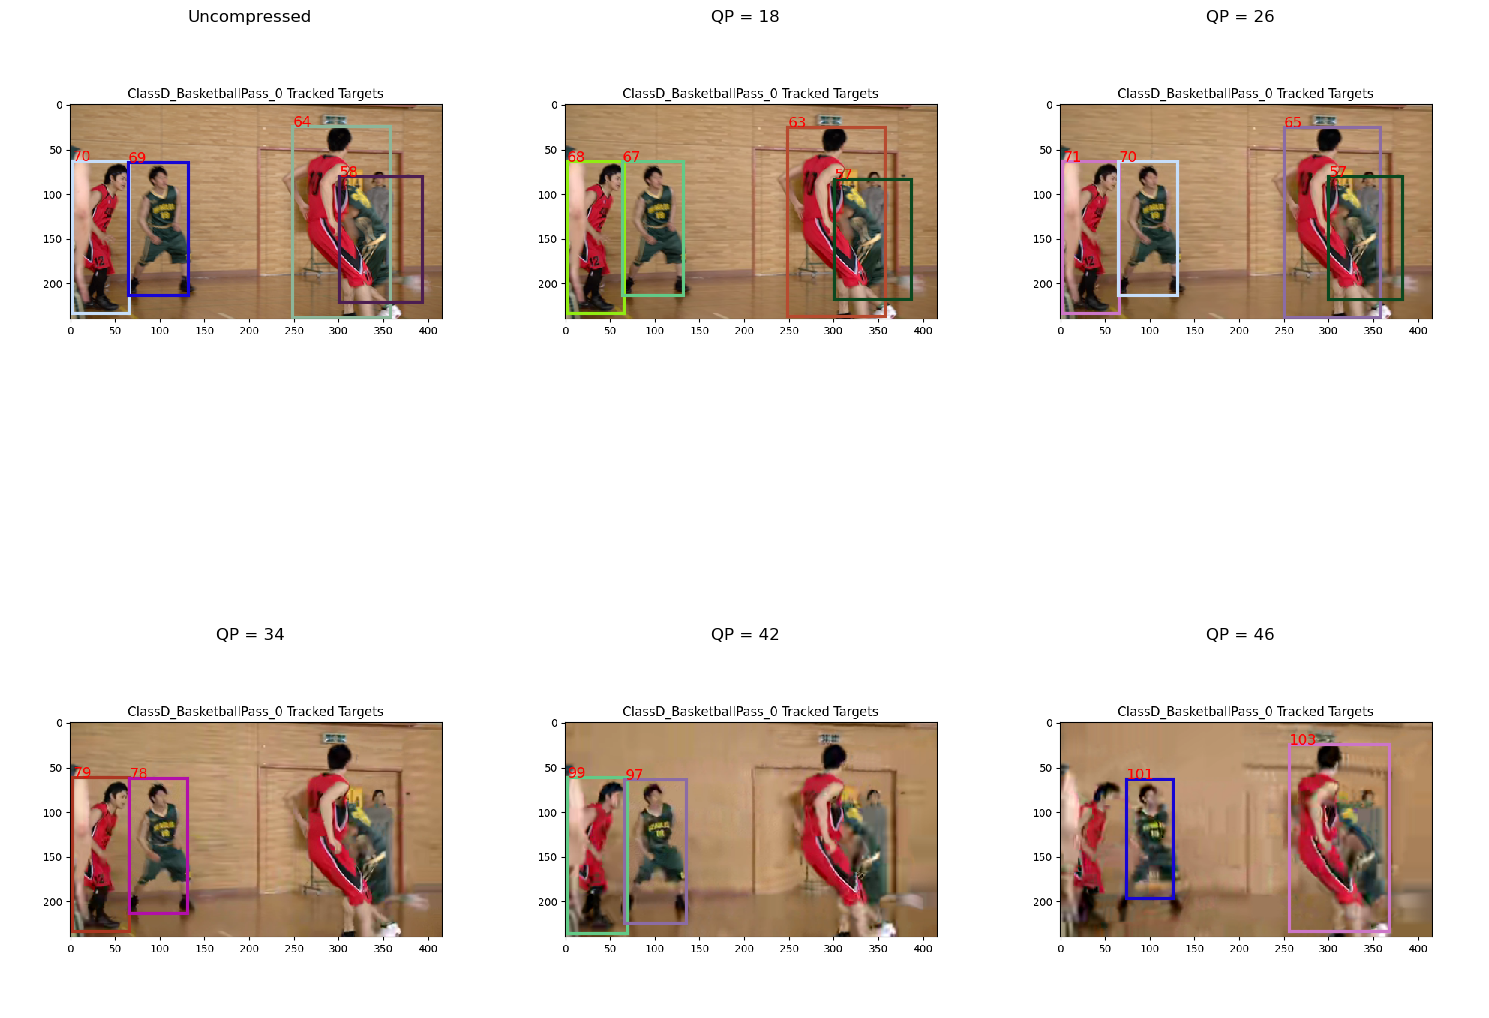

In [10]:
from skimage import io
plt.style.use('default')

class_cat = "ClassD"
seq_name = "BasketballPass"
class_id = "0"
resln = "416x240"
frame_rate = "50"

uncomp_path = f"C:/Users/Takehiro/Workspace/thesis/data/vid/{class_cat}_{seq_name}_{class_id}_uncomp"

frame_id = "425"
img_uncomp = io.imread(f"{uncomp_path}/{seq_name}_{resln}_{frame_rate}_seq_{frame_id}.png", plugin='matplotlib')

fig, axes = plt.subplots(2, 3, figsize=(15,15))
ax = axes.ravel()
axes[0,0].imshow(img_uncomp)
axes[0,0].set_title("Uncompressed")
axes[0,0].set_axis_off()

qp_arr = [18, 26, 34, 42, 46]
i = 0
j = 1
for qp in qp_arr:
    comp_path =  f"C:/Users/Takehiro/Workspace/thesis/data/vid/{class_cat}_{seq_name}_{class_id}_qp{qp}_msr16"
    img_comp = io.imread(f"{comp_path}/rec_seq_{frame_id}.png", plugin='matplotlib')
    axes[i,j].imshow(img_comp)
    axes[i,j].set_title(f"QP = {qp}")
    axes[i,j].set_axis_off()
    
    j += 1
    if j == 3:
        i += 1
        j = 0

plt.tight_layout()
plt.show()